In [1]:
from scipy.spatial import KDTree
import numpy as np
import numba
import scipy.io as sio
import laspy
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
NB_ROOT = '/nas2/YJ/DATA/ALS2DTM/las_tiles/NB/'
NEW_PATH = '/nas2/YJ/DATA/ALS2DTM/NB_abs_knn'
if not os.path.exists(NEW_PATH):
    os.makedirs(NEW_PATH)

In [3]:
def get_grid(points, k=10) :
    points2d = points[:, 0:2]
    Tree = KDTree(points2d)
    
    knn_points = np.zeros((500,500,30))
    for i in range (500) :
        for j in range (500) :
            _, idx = Tree.query((i+0.5,j+0.5), k)
            neighbours = points[idx]
            neighbours[:,0] = np.abs(points[idx][:,0] - (i+0.5))
            neighbours[:,1] = np.abs(points[idx][:,1] - (j+0.5))
            knn_points[499-j][i] = np.concatenate(neighbours)

    return knn_points

In [4]:
filenames = [f for f in os.listdir(NB_ROOT) if 'las' in f]
for filename in filenames :
    lasfile = os.path.join(NB_ROOT, filename)
    with open(lasfile, 'rb') as f :
        las = laspy.read(f)
    points = np.vstack((las.x- las.x.min(), las.y - las.y.min(), las.z)).transpose().astype(np.float32)
    new_features = get_grid(points)
    with open(os.path.join(NEW_PATH, filename.replace('las', 'npy')), 'wb') as f_w :
        np.save(f_w, new_features)

In [ ]:
# For normalization
data[:,:,2::3].min() -= data[:,:,2::3].min()

In [38]:
data[0][0]

array([4.60000008e-01, 4.99640015e+02, 1.80400009e+01, 6.10000014e-01,
       4.99600006e+02, 1.79699993e+01, 5.50000012e-01, 4.99679993e+02,
       1.79899998e+01, 5.79999983e-01, 4.99309998e+02, 1.79899998e+01,
       6.60000026e-01, 4.99369995e+02, 1.79899998e+01])

In [44]:
data[0][0][2::3] -= 10

In [45]:
data[0][0]

array([4.60000008e-01, 4.99640015e+02, 1.80400009e+01, 6.10000014e-01,
       4.99600006e+02, 1.79699993e+01, 5.50000012e-01, 4.99679993e+02,
       1.79899998e+01, 5.79999983e-01, 4.99309998e+02, 1.79899998e+01,
       6.60000026e-01, 4.99369995e+02, 1.79899998e+01])

In [50]:
data[:,:,2::3].min() -= data[:,:,2::3].min()

9.260000228881836

# Test

In [5]:
#lasfile = '/nas2/YJ/DATA/ALS2DTM/las_tiles/NB/nb_2018_2538000_7369500.las'
lasfile = '/nas2/YJ/DATA/ALS2DTM/las_tiles/DALES/train/5080_54435.las'

In [6]:
with open(lasfile, 'rb') as f :
    las = laspy.read(f)

In [7]:
points = np.vstack((las.x- las.x.min(), las.y - las.y.min(), las.z)).transpose().astype(np.float32)

In [8]:
points.shape

(11345691, 3)

In [9]:
points2d = points[:, 0:2]
Tree = KDTree(points2d)

In [29]:
i = j = 0
_, idx = Tree.query((i+0.5,j+0.5), 10)
neighbours = points[idx]
neighbours[:,0] = np.abs(points[idx][:,0] - (i+0.5))
neighbours[:,1] = np.abs(points[idx][:,1] - (j+0.5))

In [30]:
neighbours

array([[2.99999714e-02, 6.99999928e-02, 9.43099976e+01],
       [1.59999996e-01, 3.99999917e-02, 9.43300018e+01],
       [1.69999987e-01, 9.00000036e-02, 9.43099976e+01],
       [1.20000005e-01, 1.59999996e-01, 9.43199997e+01],
       [1.99999988e-01, 9.99999940e-02, 9.42799988e+01],
       [1.39999986e-01, 1.89999998e-01, 9.43499985e+01],
       [2.99999714e-02, 2.50000000e-01, 9.43199997e+01],
       [2.00000107e-02, 2.59999990e-01, 9.43399963e+01],
       [2.80000001e-01, 1.10000014e-01, 9.43700027e+01],
       [2.50000000e-01, 1.89999998e-01, 9.43300018e+01]], dtype=float32)

In [26]:
np.abs(points[idx][:,1] - (j+0,5))

ValueError: operands could not be broadcast together with shapes (10,) (2,) 

In [31]:
import time
def get_grid(points, k=5) :
    start = time.time()
    points2d = points[:, 0:2]
    Tree = KDTree(points2d)
    
    tmp = np.zeros((500,500,3*k))
    for i in range (500) :
        for j in range (500) :
            _, idx = Tree.query((i+0.5,j+0.5), k)
            tmp[499-j][i] = np.concatenate(points[idx])
    print (time.time() - start)
    return tmp

In [32]:
data = get_grid(points)

14.635341882705688


In [20]:
import time
def get_dsm(points, k=3) :
    start = time.time()
    points2d = points[:, 0:2]
    Tree = KDTree(points2d)
    
    tmp = np.zeros((500,500))
    for i in range (500) :
        for j in range (500) :
            _, idx = Tree.query((i+0.5,j+0.5), k)
            
            tmp[499-j][i] = points[idx][:,2].max()
    print (time.time() - start)
    return tmp

In [47]:
dsm_las = get_dsm(points)

13.672231197357178


In [15]:
#matfile = '/nas2/YJ/DATA/ALS2DTM/NB/nb_2018_2538000_7369500.mat'
matfile = '/nas2/YJ/DATA/ALS2DTM/DALES/5080_54435.mat'

mat = sio.loadmat(matfile)
dsm = mat['voxel-top']

In [16]:
dsm.shape, dsm_las.shape

((1996, 1994), (500, 500))

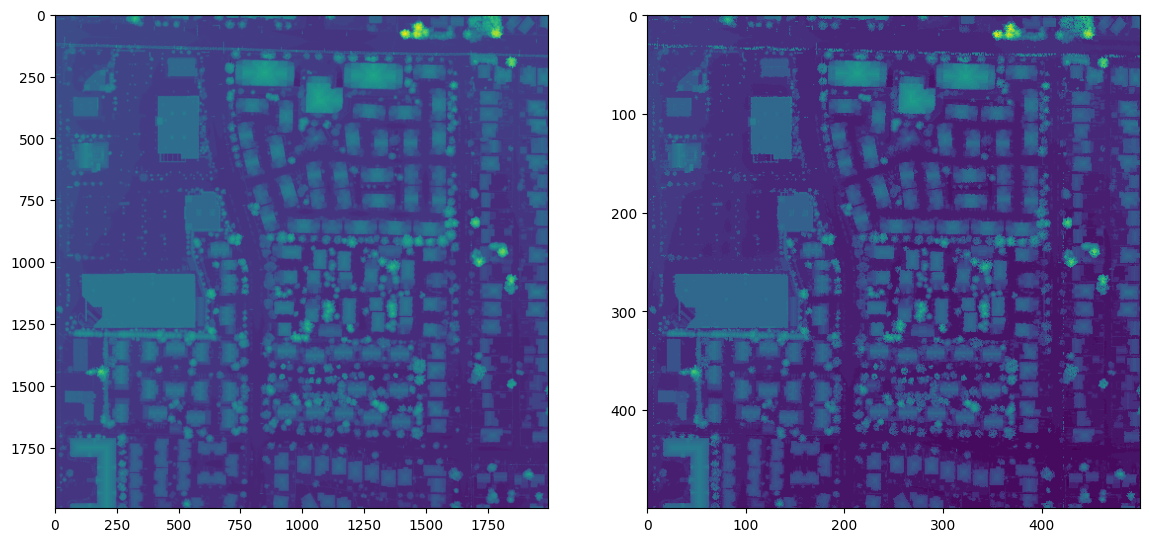

In [23]:
dsmimg = Image.fromarray(dsm.astype(np.uint8))
lasimg = Image.fromarray(dsm_las.astype(np.uint8))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 7))
ax1.imshow(dsmimg)
ax2.imshow(lasimg)
plt.show()

In [48]:
dsm_las.min(), dsm.min(), dsm_las.max(), dsm.max()

(91.29000091552734, 88.54000091552734, 127.5999984741211, 127.98999786376953)